In [1]:
magma_dir = '/home/marco/epfl/magma/'

### **Config**

In [2]:
gps_file = magma_dir+'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05/'+\
    'gps_pegasus_bull_para_embed_merged_overlaps_bybook.txt'

### **Init**

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

def px_paral_coord(df, generative_param, metrics):

    fig = px.parallel_coordinates(
        df,
        color=generative_param,
        dimensions=metrics + [generative_param],
        color_continuous_scale=px.colors.diverging.Portland,
    )

    fig.show()

In [4]:
import pandas as pd

with open(gps_file, 'r') as f:
    ls = f.readlines()
    data = [[x.strip() for x in l.split('|')] for l in ls]
    
gps = pd.DataFrame.from_records(data)
gps.columns = gps.iloc[0]

gps = gps.drop([0, 1, len(gps)-1], axis='index')
gps = gps.astype('float', errors='ignore')
gps

,sentence_distilroberta_cosine,rougeL_fmeasure,rouge2_fmeasure,rouge1_fmeasure,rougeL_precision,rouge2_precision,rouge1_precision,rougeL_recall,rouge2_recall,rouge1_recall,min_length,length_penalty,num_beams,no_repeat_ngram_size
2,66.928273,23.17,14.07,31.00,17.75,11.02,23.80,41.67,25.03,55.22,5.0,1.9,6.0,5.0
3,66.928273,23.13,14.04,31.01,17.68,10.99,23.71,41.71,24.95,55.12,10.0,1.9,6.0,5.0
4,66.928273,23.06,14.12,31.04,17.68,11.06,23.76,41.73,25.07,55.20,15.0,1.9,6.0,5.0
5,66.808498,23.39,14.27,31.22,18.28,11.38,24.38,41.24,24.84,54.19,15.0,1.9,6.0,4.0
6,66.808498,23.39,14.21,31.20,18.25,11.37,24.43,41.21,24.75,54.26,5.0,1.9,6.0,4.0
7,66.808498,23.30,14.23,31.27,18.17,11.36,24.46,41.22,24.84,54.34,10.0,1.9,6.0,4.0
8,66.730362,23.94,14.32,32.09,19.55,11.93,26.15,38.75,22.61,51.77,10.0,1.9,6.0,3.0
9,66.730362,23.84,14.39,32.20,19.44,11.98,26.21,38.57,22.75,51.75,5.0,1.9,6.0,3.0
10,66.730362,23.81,14.37,32.03,19.56,12.04,26.11,38.60,22.64,51.57,15.0,1.9,6.0,3.0
11,66.271681,25.51,15.37,33.50,22.12,13.69,29.15,36.65,21.21,48.07,15.0,1.9,4.0,3.0


In [5]:
metrics_to_keep = ['sentence_distilroberta_cosine', 'rouge1_fmeasure', 'rouge2_fmeasure', 'rougeL_fmeasure']
params_to_keep = ['min_length', 'length_penalty', 'num_beams', 'no_repeat_ngram_size']
gps = gps[metrics_to_keep+params_to_keep]

### **Parallel Coordinates Maximize ROUGE**

In [14]:
gps_best_rouge = gps.copy()

In [15]:
for p in params_to_keep:
    px_paral_coord(gps_best_rouge, p, metrics_to_keep)

In [16]:
gps_best_rouge = gps_best_rouge[gps_best_rouge['num_beams'] == 4]

In [17]:
for p in params_to_keep:
    if p != 'num_beams':
        px_paral_coord(gps_best_rouge, p, metrics_to_keep)

In [18]:
gps_best_rouge = gps_best_rouge[gps_best_rouge['length_penalty'] == 1]

In [19]:
for p in params_to_keep:
    if p != 'num_beams' and p != 'length_penalty':
        px_paral_coord(gps_best_rouge, p, metrics_to_keep)

In [20]:
gps_best_rouge = gps_best_rouge[gps_best_rouge['no_repeat_ngram_size'] == 3]

In [21]:
for p in params_to_keep:
    if p != 'num_beams' and p != 'length_penalty' and p != 'no_repeat_ngram_size':
        px_paral_coord(gps_best_rouge, p, metrics_to_keep)

### **Parallel Coordinates Maximize ST**

In [22]:
gps_best_st = gps.copy()

In [23]:
for p in params_to_keep:
    px_paral_coord(gps_best_st, p, metrics_to_keep)

In [24]:
gps_best_st = gps_best_st[gps_best_st['length_penalty'] == 1.9]

In [25]:
for p in params_to_keep:
    if p != 'length_penalty':
        px_paral_coord(gps_best_st, p, metrics_to_keep)

In [26]:
gps_best_st = gps_best_st[gps_best_st['num_beams'] == 6]

In [27]:
for p in params_to_keep:
    if p != 'length_penalty' and p != 'num_beams':
        px_paral_coord(gps_best_st, p, metrics_to_keep)

In [28]:
gps_best_st = gps_best_st[gps_best_st['no_repeat_ngram_size'] == 5]

In [29]:
for p in params_to_keep:
    if p != 'length_penalty' and p != 'num_beams' and p != 'no_repeat_ngram_size':
        px_paral_coord(gps_best_st, p, metrics_to_keep)

### **Parallel Coordinates Find Balance**

In [35]:
gps_balance = gps.copy()

In [36]:
for p in params_to_keep:
    px_paral_coord(gps_balance, p, metrics_to_keep)

In [37]:
gps_balance = gps_balance[gps_balance['length_penalty'] == 1]

In [38]:
for p in params_to_keep:
    if p != 'length_penalty':
        px_paral_coord(gps_balance, p, metrics_to_keep)

In [39]:
gps_balance = gps_balance[gps_balance['num_beams'] == 6]

In [40]:
for p in params_to_keep:
    if p != 'length_penalty' and p != 'num_beams':
        px_paral_coord(gps_balance, p, metrics_to_keep)

In [41]:
gps_balance = gps_balance[gps_balance['no_repeat_ngram_size'] == 3]

In [42]:
for p in params_to_keep:
    if p != 'num_beams' and p != 'length_penalty' and p != 'no_repeat_ngram_size':
        px_paral_coord(gps_balance, p, metrics_to_keep)

### **Compare**

In [43]:
import numpy as np

In [44]:
gps_best_rouge

,sentence_distilroberta_cosine,rouge1_fmeasure,rouge2_fmeasure,rougeL_fmeasure,min_length,length_penalty,num_beams,no_repeat_ngram_size
27,64.817739,34.87,16.01,27.48,10.0,1.0,4.0,3.0
28,64.817739,34.92,16.05,27.36,5.0,1.0,4.0,3.0
32,64.730507,34.59,15.59,26.83,15.0,1.0,4.0,3.0


In [45]:
gps_best_st

,sentence_distilroberta_cosine,rouge1_fmeasure,rouge2_fmeasure,rougeL_fmeasure,min_length,length_penalty,num_beams,no_repeat_ngram_size
2,66.928273,31.00,14.07,23.17,5.0,1.9,6.0,5.0
3,66.928273,31.01,14.04,23.13,10.0,1.9,6.0,5.0
4,66.928273,31.04,14.12,23.06,15.0,1.9,6.0,5.0


In [46]:
gps_balance

,sentence_distilroberta_cosine,rouge1_fmeasure,rouge2_fmeasure,rougeL_fmeasure,min_length,length_penalty,num_beams,no_repeat_ngram_size
20,65.174735,34.26,15.57,26.71,10.0,1.0,6.0,3.0
21,65.174735,34.30,15.46,26.68,5.0,1.0,6.0,3.0
22,65.095174,34.12,15.54,26.42,15.0,1.0,6.0,3.0


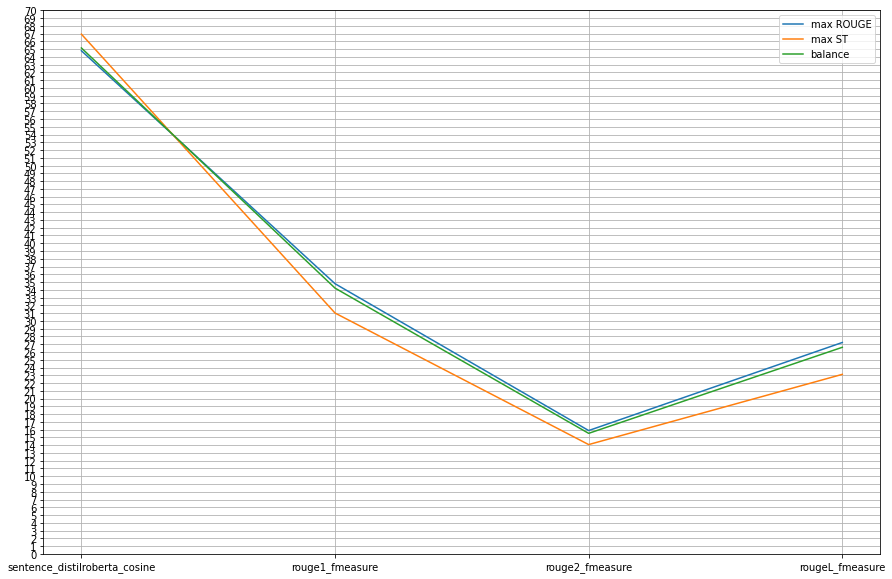

In [47]:
plt.figure(figsize=(15, 10))
plt.plot(
    gps_best_rouge.apply(np.mean)[metrics_to_keep], label='max ROUGE')
plt.plot(
    gps_best_st.apply(np.mean)[metrics_to_keep], label='max ST')
plt.plot(
    gps_balance.apply(np.mean)[metrics_to_keep], label='balance')
plt.yticks(np.linspace(0, 70, 71))
plt.grid()
plt.legend()
plt.show()